판다스 - 데이터 분석 도구
- 구성 요소 3가지
    - Series : 1개의 컬럼 값만으로 1차원 데이터 셋
    - DataFrame : Column X Row 2차원 데이터 셋(테이블 구조)
    - Index : 고유한 Key값

In [75]:
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
path = "../malgun.ttf"
font_name = fm.FontProperties(fname=path).get_name()
matplotlib.rc('font', family=font_name)
plt.rc('font', family="Malgun Gothic")

In [76]:
# 예시 데이터프레임 생성
data = {
    "USD" : [1.1, 1.2, 1.3, 1.4, 1.5],
    "EUR" : [1.3, 1.4, 1.5, 1.6, 1.7]
}
df = pd.DataFrame(data)

In [77]:
df

,USD,EUR
0,1.1,1.3
1,1.2,1.4
2,1.3,1.5
3,1.4,1.6
4,1.5,1.7


<Axes: title={'center': '네이버환율정보'}>

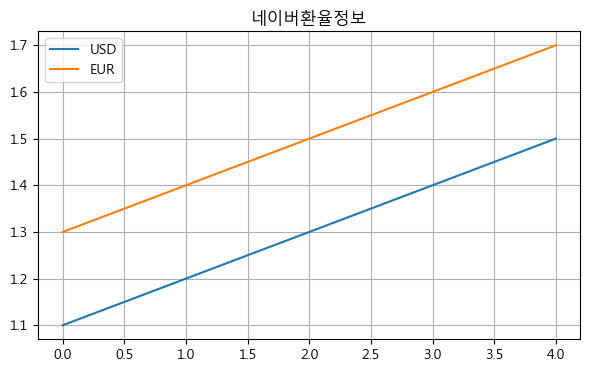

In [78]:
# 시각화
df.plot(figsize=(7, 4), title = "네이버환율정보", grid=True)

#### Series 구조
- 판다스가 제공하는 객체
- 객체 생성 : 생성자 호출 -> 전역변수에 대한 초기화 - 파라미터에 아무것도 없는 것 : 디폴트생성자
- pd는 Series의 소유주다
- Series(list가 올 수 있따.)

In [79]:
type([1,2,3])

list

In [80]:
type({"mem_id": "kiwi"})
se = pd.Series({"mem_id": "kiwi"})

In [81]:
import pandas as pd
se = pd.Series([1, 2, 3, 4, 5])

특정값 추출 - values, index

In [82]:
print(se[0])
print(se[3])

1
4


In [83]:
# 파라미터에 리스트도 딕셔너리도 튜플도 가능하다
se = pd.Series((1, 2, 3))


In [84]:
se[len(se)-1]

np.int64(3)

In [85]:
se[2]

np.int64(3)

In [86]:
se[len(se)-1] == se[2]

np.True_

In [87]:
se = pd.Series([1, 2, 3, 4, 5])
se.index

RangeIndex(start=0, stop=5, step=1)

In [88]:
se.values # Series 안에 Numpy가 포함되어 있다.

array([1, 2, 3, 4, 5])

In [89]:
### index 변경

se.index = ['a', 'b', 'c', 'd', 'e']
se

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [90]:
print(se['a'])
print(se['d'])

1
4


index 이름을 명시하여 Series 생성하기

In [91]:
# Series 생성 2 - index 명시
# Series(파라미터1, 파리미터2, 파라미터3, ...)
se2 = pd.Series([1,2,3,4,5], index = ['a','b','c', 'd', 'e'])
se2.name = "numOrder" # value 이름
se2.index.name = "numName" # index 이름
se2

numName
a    1
b    2
c    3
d    4
e    5
Name: numOrder, dtype: int64

In [92]:
se2 > 2 

numName
a    False
b    False
c     True
d     True
e     True
Name: numOrder, dtype: bool

In [93]:
se[se>2]

c    3
d    4
e    5
dtype: int64

In [94]:
se[se<3]

a    1
b    2
dtype: int64

In [95]:
se[-(se > 2)] #역순 허용

a    1
b    2
dtype: int64

DataFrame(데이터 프레임)
- Pandas에서 행과 열을 가지는 자료구조
- 데이터프레임은 2차원이므로 행 방향 인덱스와 열 방향 인덱스가 존재한다.
- 데이터프레임은 열, 인덱스, 값으로 구성된다.

In [96]:
data = {'name' : ['Lee', 'Park', 'Kim', 'Choi'],
            'score' : [85, 90, 100, 70],
            'grade' : ['B', 'A', 'A', 'C']
        }
df = pd.DataFrame(data)
df

,name,score,grade
0,Lee,85,B
1,Park,90,A
2,Kim,100,A
3,Choi,70,C


In [97]:
df = pd.DataFrame(data, columns=['name','grade', 'score']) # 열 값 조정가능
df

,name,grade,score
0,Lee,B,85
1,Park,A,90
2,Kim,A,100
3,Choi,C,70


In [98]:
df.values # numpy 기반 - array

array([['Lee', 'B', 85],
       ['Park', 'A', 90],
       ['Kim', 'A', 100],
       ['Choi', 'C', 70]], dtype=object)

In [99]:
df.columns

Index(['name', 'grade', 'score'], dtype='object')

In [100]:
df.index.name = 'No.'
df.columns.name = 'Info'
df

Info,name,grade,score
No.,,,
0,Lee,B,85
1,Park,A,90
2,Kim,A,100
3,Choi,C,70


In [101]:
# 특정값 추출하기
df['name'].values

array(['Lee', 'Park', 'Kim', 'Choi'], dtype=object)

In [102]:
# 행열 지정으로 특정값 추출
df.loc[1, 'name'] #loc

'Park'

In [103]:
df = df.set_index('name')
df.loc['Choi', 'grade']

'C'

In [104]:
df

Info,grade,score
name,,
Lee,B,85
Park,A,90
Kim,A,100
Choi,C,70


In [105]:
# DataFrame을 딕셔너리로 변환
df.to_dict()

{'grade': {'Lee': 'B', 'Park': 'A', 'Kim': 'A', 'Choi': 'C'},
 'score': {'Lee': 85, 'Park': 90, 'Kim': 100, 'Choi': 70}}

In [106]:
import numpy as np
array = np.array([['Lee' ,100, 'A'],['Park', 95, 'A'],['Kim', 85, 'B']])
df =pd.DataFrame(data, columns=['name', 'score', 'grade'])
df

,name,score,grade
0,Lee,85,B
1,Park,90,A
2,Kim,100,A
3,Choi,70,C


In [107]:
df.values

array([['Lee', 85, 'B'],
       ['Park', 90, 'A'],
       ['Kim', 100, 'A'],
       ['Choi', 70, 'C']], dtype=object)

데이터 셀렉션 및 필터링
1) [] - 컬럼 기반 필터링 또는 불린 인덱싱 필터링 제공
(ex: df.컬럼명, df['컬럼명'], df[1:3], df[:2])
2) loc[인덱스명, 컬럼명] - 명칭(label) 기반 인덱싱
- index명, column명 기준으로 데이터가 조회됩니다.
(ex: 하나의 행만 검색 - df.loc[0])

In [108]:
df.name

0     Lee
1    Park
2     Kim
3    Choi
Name: name, dtype: object

In [109]:
df['name']

0     Lee
1    Park
2     Kim
3    Choi
Name: name, dtype: object

In [110]:
# 콜론 앞에 숫자는 시작되는 index 이고 콜론 뒤에 숫자는 미포함
df[1:3]

,name,score,grade
1,Park,90,A
2,Kim,100,A


In [111]:
df[:2]

,name,score,grade
0,Lee,85,B
1,Park,90,A


In [112]:
df[-1:]

,name,score,grade
3,Choi,70,C


2) loc[인덱스명, 컬럼명] - 명칭(label) 기반 인덱싱
- index명, column명 기준으로 데이터가 조회됩니다.
(ex: 하나의 행만 검색 - df.loc[0])

In [113]:
# 여러 행을 검색할 때
df.loc[0]

name     Lee
score     85
grade      B
Name: 0, dtype: object

In [114]:
df.loc[[0,1]]

,name,score,grade
0,Lee,85,B
1,Park,90,A


In [115]:
# 여러 행과 열을 검색할 때
df.loc[0:2,['score', 'grade']]

,score,grade
0,85,B
1,90,A
2,100,A


In [116]:
df.loc[[0,2]]

,name,score,grade
0,Lee,85,B
2,Kim,100,A


In [117]:
df.loc[0:2]

,name,score,grade
0,Lee,85,B
1,Park,90,A
2,Kim,100,A


In [119]:
print(df.loc[0:2])
print(df[0:2])
# 차이 확인하기

   name  score grade
0   Lee     85     B
1  Park     90     A
2   Kim    100     A
   name  score grade
0   Lee     85     B
1  Park     90     A


3. iloc[인덱스, 컬럼인덱스] - 위치기반 인덱싱
- 0을 출발점으로 하는 가로축, 세로축 좌표 기반의 행과 열 위치를 기반으로 데이터를 지정
- 행, 열 위치값으로 정수를 사용할 수 있음. 오직 인덱스 기준으로 데이터를 가져옴

In [128]:
df.iloc[1,2]

'A'

In [130]:
df.iloc[3]

name     Choi
score      70
grade       C
Name: 3, dtype: object

In [129]:
df.iloc[0:3]

,name,score,grade
0,Lee,85,B
1,Park,90,A
2,Kim,100,A


In [131]:
df.iloc[0:3, 0:2]

,name,score
0,Lee,85
1,Park,90
2,Kim,100


In [132]:
df.iloc[0:2, 0:1]

,name
0,Lee
1,Park


4. 불린(Boolean) 인덱스

In [134]:
df.loc[df['score'] > 90]

,name,score,grade
2,Kim,100,A


In [140]:
df.loc[df['grade'] == 'A']

,name,score,grade
1,Park,90,A
2,Kim,100,A
